In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime 

In [2]:
gold_df=pd.read_csv("C:\\Users\\nafissaad\\Tutorial\\Pattern Recognition\\LBMA-GOLD.CSV")
gold_df['Date']=pd.to_datetime(gold_df['Date'])
gold_df=gold_df[['Date','USD (AM)']]
gold_df.columns=['Date','GLD']
gold_df['GLD']=pd.to_numeric(gold_df['GLD'],errors='coerce')
print(np.min(gold_df['Date'] ),np.max(gold_df['Date'] ))
gold_df=gold_df.sort_values('Date',ascending=True)
gold_df

1968-01-02 00:00:00 2023-02-24 00:00:00


,Date,GLD
13938,1968-01-02,35.18
13937,1968-01-03,35.16
13936,1968-01-04,35.14
13935,1968-01-05,35.14
13934,1968-01-08,35.14
...,...,...
4,2023-02-20,1844.20
3,2023-02-21,1833.20
2,2023-02-22,1833.45
1,2023-02-23,1826.95


In [3]:
gold_df[0:30]

,Date,GLD
13938,1968-01-02,35.18
13937,1968-01-03,35.16
13936,1968-01-04,35.14
13935,1968-01-05,35.14
13934,1968-01-08,35.14
13933,1968-01-09,35.14
13932,1968-01-10,35.15
13931,1968-01-11,35.17
13930,1968-01-12,35.18
13929,1968-01-15,35.18


In [4]:
gold_df[31:60]

,Date,GLD
13907,1968-02-14,35.20
13906,1968-02-15,35.20
13905,1968-02-16,35.20
13904,1968-02-19,35.20
13903,1968-02-20,35.20
13902,1968-02-21,35.20
13901,1968-02-22,35.20
13900,1968-02-23,35.20
13899,1968-02-26,35.20
13898,1968-02-27,35.20


In [5]:
def split_seq(seq,number_picece):
    start=0
    for i in range(number_picece):
        stop=start+len(seq[i::number_picece])
        yield seq[start:stop]
        start=stop

In [6]:
x=list(np.random.rand(20))
x

[0.7525265159786789,
 0.45039498153180624,
 0.23554224060175166,
 0.7488859213525232,
 0.08138594629462703,
 0.3369390206884907,
 0.32627604789334286,
 0.09208642646100607,
 0.15674182989495034,
 0.7113861473440074,
 0.20830287830209793,
 0.5027219097269257,
 0.8876284441829585,
 0.0790353457369638,
 0.710541002487298,
 0.7235000843717823,
 0.29374158608829826,
 0.6331268735267004,
 0.9432311652605377,
 0.8035821265272128]

In [7]:
z=split_seq(x,5)
next(z)

[0.7525265159786789,
 0.45039498153180624,
 0.23554224060175166,
 0.7488859213525232]

In [8]:
next(z)

[0.08138594629462703,
 0.3369390206884907,
 0.32627604789334286,
 0.09208642646100607]

In [9]:
#pearson correlation between tow list
def pearson(s1,s2):
    s1_c=s1-np.mean(s1)
    s2_c=s2-np.mean(s2)
    return np.sum(s1_c*s2_c)/np.sqrt(np.sum(s1_c**2)*np.sum(s2_c**2))

In [10]:
pearson([0.3084593207267424,
 0.18020184760759483,
 0.9653066787167316,
 0.07469313734179306],[0.27939183585290805,
 0.7812756057185833,
 0.7427862663244826,
 0.07991884341188249])

0.5534492518059494

In [11]:
gold_df=gold_df.sort_values('Date',ascending=True)
lookback=30
dates=gold_df['Date']
prices=list(gold_df['GLD'].values)
dates,prices

(13938   1968-01-02
 13937   1968-01-03
 13936   1968-01-04
 13935   1968-01-05
 13934   1968-01-08
            ...    
 4       2023-02-20
 3       2023-02-21
 2       2023-02-22
 1       2023-02-23
 0       2023-02-24
 Name: Date, Length: 13939, dtype: datetime64[ns],
 [35.18,
  35.16,
  35.14,
  35.14,
  35.14,
  35.14,
  35.15,
  35.17,
  35.18,
  35.18,
  35.19,
  35.2,
  35.2,
  35.19,
  35.19,
  35.19,
  35.2,
  35.2,
  35.2,
  35.19,
  35.19,
  35.2,
  35.2,
  35.2,
  35.19,
  35.19,
  35.2,
  35.19,
  35.2,
  35.19,
  35.19,
  35.2,
  35.2,
  35.2,
  35.2,
  35.2,
  35.2,
  35.2,
  35.2,
  35.2,
  35.2,
  35.2,
  35.2,
  35.2,
  35.2,
  35.2,
  35.2,
  35.2,
  35.2,
  35.2,
  35.2,
  35.2,
  35.2,
  38.0,
  37.6,
  37.7,
  36.7,
  37.2,
  37.0,
  37.25,
  37.6,
  38.05,
  38.1,
  38.0,
  37.6,
  37.65,
  38.3,
  38.05,
  38.35,
  38.25,
  38.5,
  38.55,
  39.1,
  39.1,
  39.25,
  39.6,
  39.7,
  39.3,
  39.5,
  39.7,
  39.8,
  39.4,
  39.6,
  40.1,
  40.85,
  41.6,
  42.0,
  4

In [12]:
counter_=-1#Because python count starts with 0
price_series=[]

In [13]:
for day in dates:
    counter_+=1
    if counter_>=lookback:
        price_series.append(prices[counter_-lookback:counter_])
timeseries_df=pd.DataFrame(price_series)

In [14]:
timeseries_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,35.18,35.16,35.14,35.14,35.14,35.14,35.15,35.17,35.18,35.18,...,35.19,35.20,35.20,35.20,35.19,35.19,35.20,35.19,35.20,35.19
1,35.16,35.14,35.14,35.14,35.14,35.15,35.17,35.18,35.18,35.19,...,35.20,35.20,35.20,35.19,35.19,35.20,35.19,35.20,35.19,35.19
2,35.14,35.14,35.14,35.14,35.15,35.17,35.18,35.18,35.19,35.20,...,35.20,35.20,35.19,35.19,35.20,35.19,35.20,35.19,35.19,35.20
3,35.14,35.14,35.14,35.15,35.17,35.18,35.18,35.19,35.20,35.20,...,35.20,35.19,35.19,35.20,35.19,35.20,35.19,35.19,35.20,35.20
4,35.14,35.14,35.15,35.17,35.18,35.18,35.19,35.20,35.20,35.19,...,35.19,35.19,35.20,35.19,35.20,35.19,35.19,35.20,35.20,35.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13904,1873.80,1875.20,1884.25,1883.10,1904.05,1915.10,1904.95,1911.55,1907.50,1928.75,...,1873.50,1873.80,1880.75,1882.10,1864.10,1858.50,1860.50,1835.45,1837.30,1824.50
13905,1875.20,1884.25,1883.10,1904.05,1915.10,1904.95,1911.55,1907.50,1928.75,1927.20,...,1873.80,1880.75,1882.10,1864.10,1858.50,1860.50,1835.45,1837.30,1824.50,1844.20
13906,1884.25,1883.10,1904.05,1915.10,1904.95,1911.55,1907.50,1928.75,1927.20,1936.50,...,1880.75,1882.10,1864.10,1858.50,1860.50,1835.45,1837.30,1824.50,1844.20,1833.20
13907,1883.10,1904.05,1915.10,1904.95,1911.55,1907.50,1928.75,1927.20,1936.50,1925.85,...,1882.10,1864.10,1858.50,1860.50,1835.45,1837.30,1824.50,1844.20,1833.20,1833.45


In [15]:
timeseries_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,35.18,35.16,35.14,35.14,35.14,35.14,35.15,35.17,35.18,35.18,...,35.19,35.20,35.20,35.20,35.19,35.19,35.20,35.19,35.20,35.19
1,35.16,35.14,35.14,35.14,35.14,35.15,35.17,35.18,35.18,35.19,...,35.20,35.20,35.20,35.19,35.19,35.20,35.19,35.20,35.19,35.19
2,35.14,35.14,35.14,35.14,35.15,35.17,35.18,35.18,35.19,35.20,...,35.20,35.20,35.19,35.19,35.20,35.19,35.20,35.19,35.19,35.20
3,35.14,35.14,35.14,35.15,35.17,35.18,35.18,35.19,35.20,35.20,...,35.20,35.19,35.19,35.20,35.19,35.20,35.19,35.19,35.20,35.20
4,35.14,35.14,35.15,35.17,35.18,35.18,35.19,35.20,35.20,35.19,...,35.19,35.19,35.20,35.19,35.20,35.19,35.19,35.20,35.20,35.20


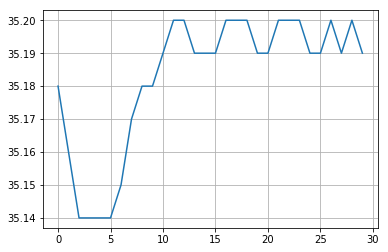

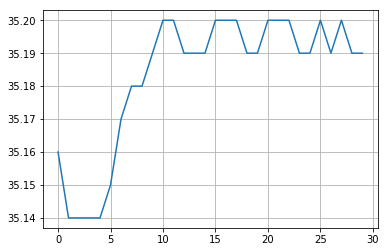

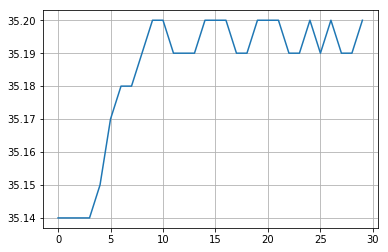

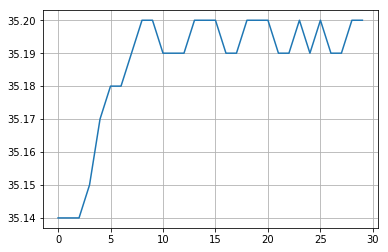

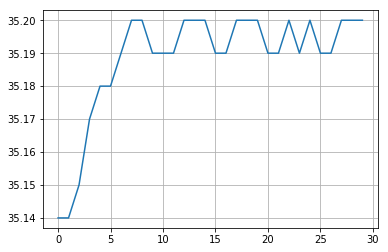

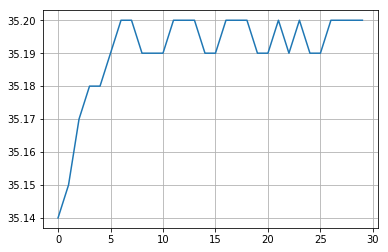

In [16]:
counter=5
for index,row in timeseries_df.iterrows():
    counter-=1
    plt.plot(row.values)
    plt.grid()
    plt.show()
    if counter<0:
        break

In [17]:
#for index,row in timeseries_df.iterrows():
    #print(row)
    #r=row
    #break

In [18]:
#[t for t in split_seq(list(r),complexity)]

In [19]:
#[np.mean(r) for r in split_seq(list(row.values),complexity)]

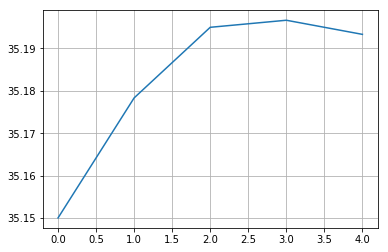

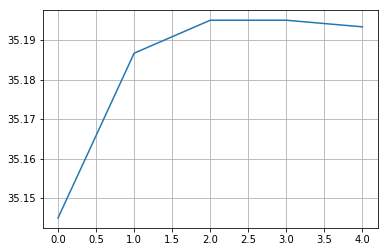

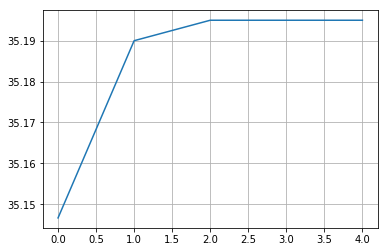

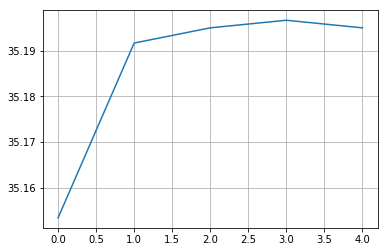

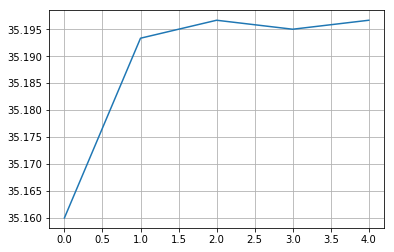

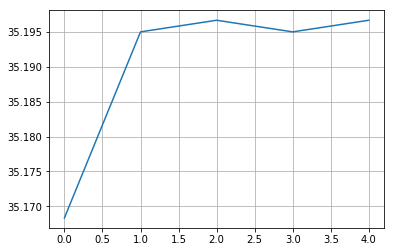

In [20]:
counter=5
complexity=5
for index,row in timeseries_df.iterrows():
    counter-=1
    plt.plot([np.mean(r) for r in split_seq(list(row.values),complexity)])
    plt.grid()
    plt.show()
    if counter<0:
        break

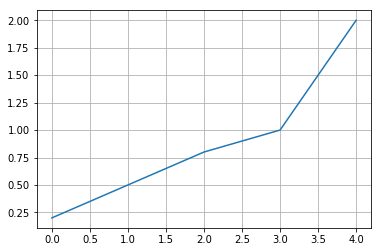

In [21]:
#Creating an ideal shape pattern
correlate_against_up=[0.2,0.5,0.8,1,2]
correlate_against_down=[0,0,0,-1,-2]
plt.plot(correlate_against_up)
plt.grid()

In [22]:
complexity=5
outcome_list=[]
for index,row in timeseries_df.iterrows():
    simplified_values=[]
    for r in split_seq(list(row.values),complexity):
        simplified_values.append(np.mean(r))
    correz=pearson(simplified_values,correlate_against_up)
    if correz>0.9:
        outcome_list.append(1)
    else:
        outcome_list.append(0)

In [23]:
np.mean(outcome_list)

0.1375368466460565

In [24]:
timeseries_df['outcome']=outcome_list

In [25]:
timeseries_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,outcome
0,35.18,35.16,35.14,35.14,35.14,35.14,35.15,35.17,35.18,35.18,...,35.20,35.20,35.20,35.19,35.19,35.20,35.19,35.20,35.19,0
1,35.16,35.14,35.14,35.14,35.14,35.15,35.17,35.18,35.18,35.19,...,35.20,35.20,35.19,35.19,35.20,35.19,35.20,35.19,35.19,0
2,35.14,35.14,35.14,35.14,35.15,35.17,35.18,35.18,35.19,35.20,...,35.20,35.19,35.19,35.20,35.19,35.20,35.19,35.19,35.20,0
3,35.14,35.14,35.14,35.15,35.17,35.18,35.18,35.19,35.20,35.20,...,35.19,35.19,35.20,35.19,35.20,35.19,35.19,35.20,35.20,0
4,35.14,35.14,35.15,35.17,35.18,35.18,35.19,35.20,35.20,35.19,...,35.19,35.20,35.19,35.20,35.19,35.19,35.20,35.20,35.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13904,1873.80,1875.20,1884.25,1883.10,1904.05,1915.10,1904.95,1911.55,1907.50,1928.75,...,1873.80,1880.75,1882.10,1864.10,1858.50,1860.50,1835.45,1837.30,1824.50,0
13905,1875.20,1884.25,1883.10,1904.05,1915.10,1904.95,1911.55,1907.50,1928.75,1927.20,...,1880.75,1882.10,1864.10,1858.50,1860.50,1835.45,1837.30,1824.50,1844.20,0
13906,1884.25,1883.10,1904.05,1915.10,1904.95,1911.55,1907.50,1928.75,1927.20,1936.50,...,1882.10,1864.10,1858.50,1860.50,1835.45,1837.30,1824.50,1844.20,1833.20,0
13907,1883.10,1904.05,1915.10,1904.95,1911.55,1907.50,1928.75,1927.20,1936.50,1925.85,...,1864.10,1858.50,1860.50,1835.45,1837.30,1824.50,1844.20,1833.20,1833.45,0


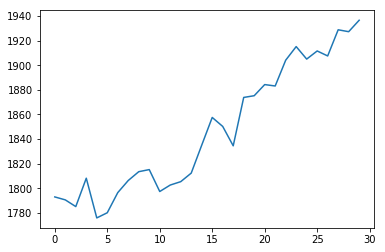

In [26]:
example=timeseries_df[timeseries_df['outcome']==1].tail().values[0][:-1]
plt.plot(example)